In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

파이썬 기반 데이터 분석 환경에서 numpy는 행렬 연산을 위한 핵심 라이브러리이다.  
numpy는 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수 및 메소드를 제공하고 메모리 버퍼에 데이터를 저장하고 처리하는 효율적인 인터페이스를 제공한다.  
파이썬의 list 객체를 개선한 numpy 의 ndarray객체를 사용하면 더 많은 데이터를 더 빠르게 처리할 수 있다.  
  
numpy의 특징    
    1. 강력한 n차원 배열 객체  
    2. 정교한 브로드 캐스팅(다대일 연산) 가능  
    3. c/c++ 및 fortran  코드 통합 도구  
    4. 유연한 선형 대수, 푸리에 변환 및 난수 기능  
    5. 범용적 처리에 사용 가능한 다차원 컨테이너

In [2]:
# numpy는 다음과 같은 데이터 타입을 지원한다. => 배열을 만들때 dtype 속성으로 데이터 타입을 지정할 수 있다.
# np.int: 정수(고정 소숫점) 타입
# np.float: 실수(부동 소숫점) 타입
# np.complex : 복소수 타입
# np.bool : 불린(논리값) 타입
# np.object : 파이썬 객체 타입
# np.string_ : 스트링 타입
# np.unicode_ : 유니코드 타입

In [3]:
import numpy as np
print(np.__version__) # __version__: 설치된 라이브러리의 버전을 얻어온다.

1.19.5


In [4]:
# numpy는 다차원 배열을 지원하고 numpy 배열 구조는 shape으로 표현한다.

numpy는 다차원 배열을 지원하고 numpy 배열 구조는 shape으로 표현한다.  
shape은 배열 구조를 튜플 자료형을 사용해서 정의한다.  
예를 들면 28 * 28 컬러 사진은 폭이 28 픽셀, 높이가 28 픽셀 , 각 픽셀은 3개의 채널 (RGB)로 구성된 구조를 가진다.  
따라서 컬러 사진의 데이터 구조는 shape(28, 28, 3) 인 3차원 배열이 된다.   
다차원 배열은 입체적인 구조를 가지며 데이터 차원은 여러 갈래의 데이터 방향(axis)을 가진다.  
3차원 배열의 데이터 방향은 면은 axis= 0 행은 axis =1  열은 axis=2로 지정한다.  

  
<img src="./images/numpyImage01.jpg" align="left" width="800"/>                                                      

In [5]:
# numpy 배열 객체 정보 출력용으로 사용할 함수 선언
def pprint(arr):
    print('type: {}'.format(type(arr)))
    print('shape: {}, dimension: {}, dtype: {}'.format(arr.shape, arr.ndim, arr.dtype))
    print('numpy 배열의 데이터\n', arr, sep='')

파이썬 list 객체로 numpy 배열을 생성할 수 있다.  
인수로 list 객체와 데이터의 타입(dtype, 생략가능)을 입력해서 numpy 배열을 생성하고 dtype 을 생략하면 인수로 넘어오는 list 객체의 데이터 타입으로 type이 설정된다.

In [6]:
# 파이썬 1차원 list로 numpy 배열 만들기
arr = [1,2,3]
print(type(arr))
print(arr)
print('='*80)

# array() 메소드는 인수로 list 객체를 넘겨받아 numpy 배열을 만든다.
# 정수형 데이터의 dtype 기본값은 np.int이고 32비트 정수 데이터를 의미한다. =>  np.int32와 같다.
# 정수형 데이터의 dtype은 np.int, np.int8, np.int16 , np.int32, np.int64를 사용할 수 있다.
#a = np.array(arr, dtype=np.int)
a = np.array(arr)
pprint(a)
print('='*80)


<class 'list'>
[1, 2, 3]
type: <class 'numpy.ndarray'>
shape: (3,), dimension: 1, dtype: int32
numpy 배열의 데이터
[1 2 3]


In [7]:
arr = [1,2.,3]
print(type(arr))
print(arr)
print('=' * 50)

# 실수형 데이터의 dtype 기본값은 np.float이고 64비트 정수 데이터를 의미한다. => np.float64와 같다.
# 정수형 데이터의 dtype은 np.float , np.float16 , np.float32, np.floatt64를 사용할 수 있다.
a= np.array(arr)
pprint(a)

<class 'list'>
[1, 2.0, 3]
type: <class 'numpy.ndarray'>
shape: (3,), dimension: 1, dtype: float64
numpy 배열의 데이터
[1. 2. 3.]


In [8]:
# 파이썬 2차원 list로 numpy 배열 만들기
arr = [[[1,2,3],[4,5,6]],[[11,22,33],[44,55,66]]]
print(type(arr))
print(arr)
print('=' * 50)

a = np.array(arr, dtype=np.float)
pprint(a)

<class 'list'>
[[[1, 2, 3], [4, 5, 6]], [[11, 22, 33], [44, 55, 66]]]
type: <class 'numpy.ndarray'>
shape: (2, 2, 3), dimension: 3, dtype: float64
numpy 배열의 데이터
[[[ 1.  2.  3.]
  [ 4.  5.  6.]]

 [[11. 22. 33.]
  [44. 55. 66.]]]


numpy는 원하는 shape으로 배열을 생성하고 각 요소들을 특정 값으로 초기화시키는 메소드를 제공한다.

In [9]:
# zeros() 메소드는 지정된 shape 만큼의 배열을 생성하고 모든 요소를 0으로 초기화 시킨다. => 영행렬 
# zeros(shape[, dtype, order]) # dtype, order는 생략 가능하다.
# order => 2차원 이상의 배열일 경우 데이터가 채워지는 방식을 지정한다.
# c, c++, java, c#, python => 행 우선 방식 , fortran => 열 우선 방식 
# a = np.zeros(shape=(3,4)) # dtype을 생략하면 np.float64로 배열이 만들어진다.
#a = np.zeros(shape=(3,4), dtype=np.int) # dtype을 지정하면 지정된 dtype으로 배열이 만들어 진다.
a = np.zeros(shape=(3,4) , dtype=np.int , order='f')
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: int32
numpy 배열의 데이터
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [10]:
# ones() 메소드는 지정된 shape 만큼 배열을 생ㅇ성하고 모든 요소를 1로 초기화 시킨다.
# ones(shape[, dtype, order])
a= np.ones(shape=(3,4), dtype=np.int)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: int32
numpy 배열의 데이터
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [11]:
# full() 메소드는 지정된 shape 만큼 배열을 생성하고 모든 요소를 특정 값으로 초기화 시킨다.
# full(shape, fill_value[, dtype, order])
a= np.full(shape=(3,4), fill_value=7, dtype=np.int)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: int32
numpy 배열의 데이터
[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]


In [12]:
# eye() 메소드는 지정된 shape 만큼 크기를 가지는 단위 행렬(주 대각 요소만 1이고 나머지는 0인 행렬)을 만든다.
# eye(n[, dtype])
a = np.eye(5, dtype=np.int)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (5, 5), dimension: 2, dtype: int32
numpy 배열의 데이터
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [57]:
# empty() 메소드는 지정된 shape 만큼 배열을 만들기만 하고 초기화 하지 않는다. => 쓰레가 저장된다.
# empty(shape[, dtype , order])
a = np.empty(shape=(3,4))
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: float64
numpy 배열의 데이터
[[0.46562754 0.3667306  0.20512729 0.68900481]
 [0.271435   0.16560736 0.68871963 0.74102101]
 [0.99933286 0.38518281 0.48310753 0.29292898]]


like 메소드  
numpy는 인수로 지정한 배열과 shape이 같은 배열을 만드는 like 메소드를 제공한다 .  
zeros_like(), ones_like(), full_like(), empty_like()

In [14]:
a = np.array([[1,2,3], [4,5,6]])
print(a)
b= np.zeros_like(a)
print(b)
c = np.ones_like(a)
print(c)
d = np.full_like(a, fill_value =9)
print(d)
e = np.empty_like(a)
print(e)

[[1 2 3]
 [4 5 6]]
[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]
[[9 9 9]
 [9 9 9]]
[[-2021665648         633           0]
 [          0      131074           0]]


데이터 생성 메소드   
numpy는 주어진 조건으로 데이터를 생성한 후 배열을 만드는 데이터 생성 메소드를 제공한다.  
linspace(), arnage(), logspace()  

In [15]:
import matplotlib.pyplot as plt # 시각화 라이브러리 import
# %mathplotlib inline
# %matplotlib notebook

In [16]:
# linspace() 메소드는 start 부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만든다 .
# linspace(start,stop, num)
a = np.linspace(0,1,5)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (5,), dimension: 1, dtype: float64
numpy 배열의 데이터
[0.   0.25 0.5  0.75 1.  ]


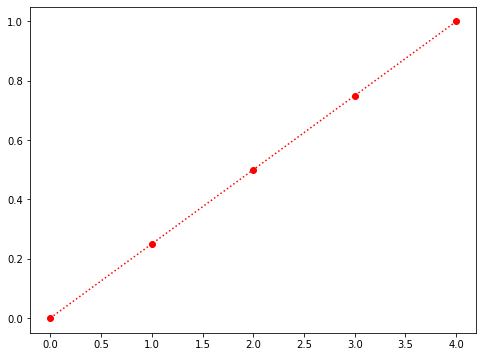

In [17]:
plt.figure(figsize=(8,6))
plt.plot(a, 'ro:')
plt.show()

In [18]:
# arange() 메소드는 start 부터 stop 미만까지 step 간격으로 데이터를 생성하고 배열을 만든다 .
# arange([start, ]stop[, step, dtype])
# linspace() 메소드는 요소의 개수를 지정해 배열을 만들지만 arange() 메소드는 요소의 개수가 아닌 데이터의 간격을 
# 기준으로 균등한 간격의 배열을 만든다.
# start를 생략하면 0, step을 생략하면 1이 기본값으로 사용된다.
# arange(10), arange(0,10),arange(0,10,1)은 모두 같은 기능이 실행된다.
a = np.arange(0,10,2,dtype=np.float32)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (5,), dimension: 1, dtype: float32
numpy 배열의 데이터
[0. 2. 4. 6. 8.]


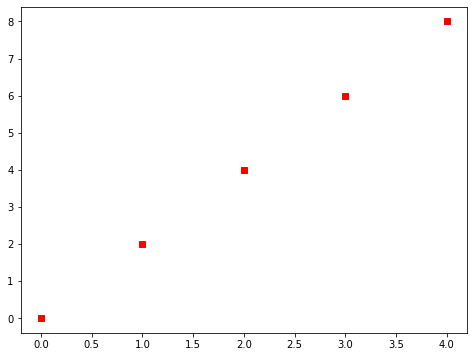

In [19]:
plt.figure(figsize=(8,6))
plt.plot(a,'rs')
plt.show()

In [20]:
# logspace() 메소드는 로그 스케일로 지정된 범위(start 부터 stop 사이)에서 num개 만큼 균등한 간격으로 데이터를 생성하고 
# 배열을 만든다.
# logspace(start, end,num,[, base]) # base를 생략하면 10이 기본값으로 사용된다.
a = np.logspace(1,10,100 ,base=2)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (100,), dimension: 1, dtype: float64
numpy 배열의 데이터
[   2.            2.13008218    2.26862504    2.41617889    2.5733298
    2.74070197    2.91896021    3.10881256    3.31101312    3.52636502
    3.75572364    4.            4.26016436    4.53725009    4.83235778
    5.14665959    5.48140394    5.83792042    6.21762513    6.62202624
    7.05273004    7.51144729    8.            8.52032872    9.07450018
    9.66471556   10.29331918   10.96280788   11.67584085   12.43525025
   13.24405248   14.10546008   15.02289457   16.           17.04065743
   18.14900036   19.32943111   20.58663837   21.92561576   23.35168169
   24.87050051   26.48810496   28.21092016   30.04578914   32.
   34.08131486   36.29800071   38.65886222   41.17327674   43.85123151
   46.70336338   49.74100102   52.97620991   56.42184032   60.09157828
   64.           68.16262972   72.59600142   77.31772444   82.34655347
   87.70246302   93.40672676   99.48200203  105.95241983  112.8436806

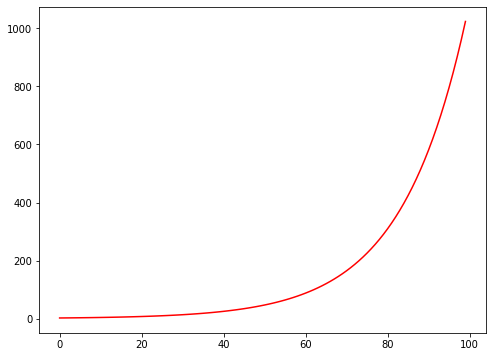

In [21]:
plt.figure(figsize=(8,6))
plt.plot(a,'r')
plt.show()

난수 기반 배열 생성  
  
numpy는 난수 발생 및 배열을 생성하는 random이라는 모듈을 제공하고 다음과 같은 메소드를 사용할 수 있다.  
normal(), randn(),rand(), randint(), random()

type: <class 'numpy.ndarray'>
shape: (10,), dimension: 1, dtype: float64
numpy 배열의 데이터
[ 1.8705798   0.54199321  0.33955427 -0.11041683  1.40505184  0.2920708
  0.0125398  -0.48117324 -0.47915711  0.71372378]


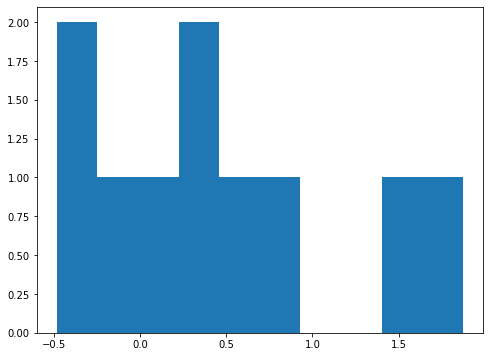

In [22]:
# normal() 메소드는 정규 분포를 따르는 난수 데이터를 생성 하고 배열을 만든다.
# normal(평균 , 표준편차 , 난수의 개수)
a = np.random.normal(0,1,10)
pprint(a)

plt.figure(figsize=(8,6))
plt.hist(a)
plt.show()

type: <class 'numpy.ndarray'>
shape: (1000000,), dimension: 1, dtype: float64
numpy 배열의 데이터
[ 1.30646141  0.97125157  0.00514953 ... -2.89641801 -0.35720828
 -0.14840409]


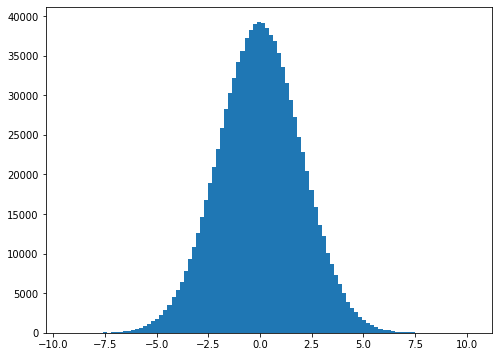

In [23]:
a = np.random.normal(0,2,1000000)
pprint(a)

plt.figure(figsize=(8,6))
plt.hist(a, bins=100) # bins옵션으로 히스토그램 막대 (구간)의 개수를 지정할 수있다.
plt.show()

type: <class 'numpy.ndarray'>
shape: (10,), dimension: 1, dtype: float64
numpy 배열의 데이터
[ 2.12413957 -0.33230973 -1.21859183 -1.05966931  2.49881246  0.48406545
  0.36428779 -0.64368606 -0.51845346 -0.7159068 ]


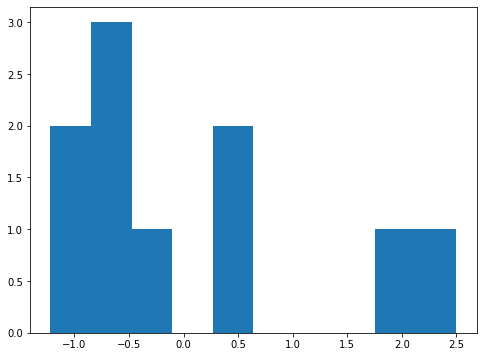

In [24]:
# randn() 메소드는 표준 정규 분포(평균이 0 , 표준편차 1)를 따르는 난수 데이터를 생성하고 배열을 만든다.
# randn(난수의 개수)
a = np.random.randn(10)
pprint(a)

plt.figure(figsize=(8,6))
plt.hist(a)
plt.show()

type: <class 'numpy.ndarray'>
shape: (10000000,), dimension: 1, dtype: float64
numpy 배열의 데이터
[ 0.3185848   0.12702744 -0.74979813 ...  0.54269329  0.36698791
 -1.66409594]


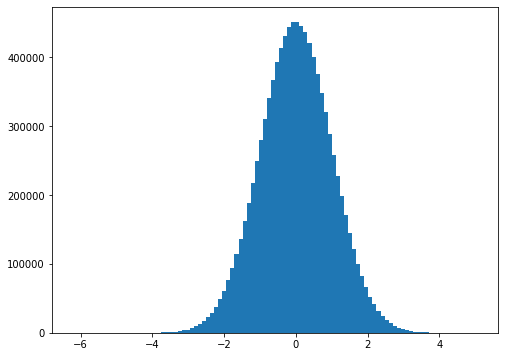

In [25]:
a = np.random.randn(10000000)
pprint(a)

plt.figure(figsize=(8,6))
plt.hist(a,bins=100)
plt.show()

type: <class 'numpy.ndarray'>
shape: (10,), dimension: 1, dtype: float64
numpy 배열의 데이터
[0.11938092 0.87767263 0.52849105 0.96955548 0.23533454 0.30563368
 0.46657968 0.42139393 0.93544492 0.37007735]


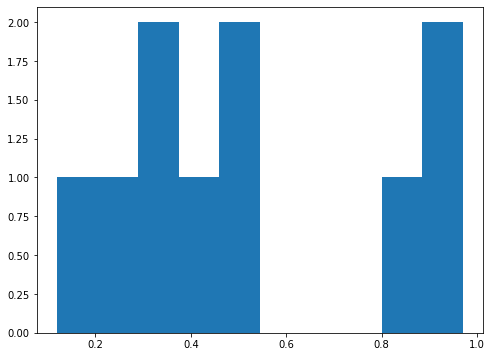

In [26]:
# rand() 메소드는 0~1 사이의 균등 분포를 따르는 난수 데이터를 생성하고 배열을 만든다.
# rand(난수의 개수)
a = np.random.rand(10)
pprint(a)

plt.figure(figsize=(8,6))
plt.hist(a)
plt.show()


type: <class 'numpy.ndarray'>
shape: (1000000,), dimension: 1, dtype: float64
numpy 배열의 데이터
[0.25169219 0.70527014 0.98905869 ... 0.51277464 0.80142665 0.44132332]


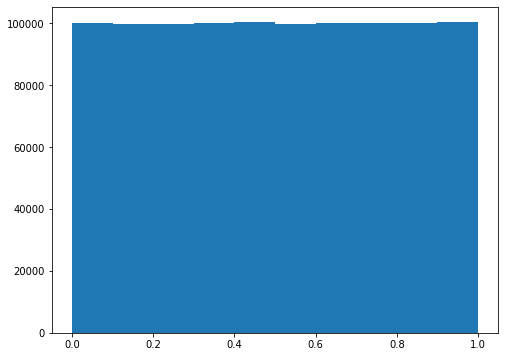

In [27]:
a = np.random.rand(1000000)
pprint(a)

plt.figure(figsize=(8,6))
plt.hist(a)
plt.show()

In [28]:
a = np.random.rand(3,4)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: float64
numpy 배열의 데이터
[[0.44082864 0.36898108 0.57586476 0.23530394]
 [0.26116689 0.14302979 0.76507179 0.12950402]
 [0.82000202 0.12721259 0.88648863 0.26013521]]


In [29]:
# randint() 메소드는 지정된 크기(low 부터 high 미만 ) 만큼의 범위에서 정수로 난수 데이터를 생성하고 배열을 만든다. 
# rand(low, high, 난수의 개수)

a = np.random.randint(1,46,6)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (6,), dimension: 1, dtype: int32
numpy 배열의 데이터
[ 7  7 31 37 38 36]


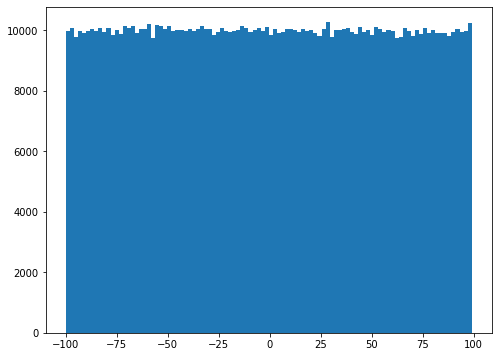

In [30]:
# -100에서 100 사이의 난수를 발생시킨다.
a = np.random.randint(-100,100,1000000)
plt.figure(figsize=(8,6))
plt.hist(a , bins=100)
plt.show()

In [31]:
a = np.random.randint(-10,10,(3,4))
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: int32
numpy 배열의 데이터
[[  5   8   3   8]
 [ -7   5   1   8]
 [  7   3   2 -10]]


In [32]:
# random() 메소드는 0부터 1 사이의 균등 분포에서 난수로 데이터를 생성하고 배열을 만든다 . 
# random(난수의 개수)
a = np.random.random(10)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (10,), dimension: 1, dtype: float64
numpy 배열의 데이터
[0.25930842 0.90629197 0.85709575 0.2311911  0.15285752 0.94626269
 0.10406853 0.41690327 0.15543175 0.79024842]


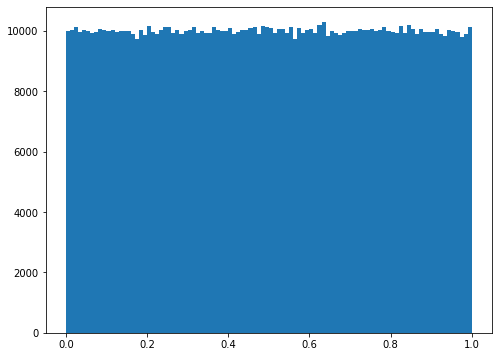

In [33]:
a = np.random.random(1000000)
plt.figure(figsize=(8,6))
plt.hist(a , bins=100)
plt.show()

In [34]:
a = np.random.random((3,4))
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: float64
numpy 배열의 데이터
[[0.46562754 0.3667306  0.20512729 0.68900481]
 [0.271435   0.16560736 0.68871963 0.74102101]
 [0.99933286 0.38518281 0.48310753 0.29292898]]


약속된 난수  
   
무작위 수를 발생시키는 난수 발생 메소드는 특정 시작 숫자로부터 난수처럼 보이는 수열을 만드는 알고리즘의 결과물이다.  
따라서 시작점을 설정하면 난수 발행을 재연할 수 있다. => 매번 같은 배열의 난수가 발생되게 할 수 있다.  


In [35]:
# seed() 메소드로 매번 같은 배열의 난수를 얻을 수 있다.
np.random.seed(100)
print(np.random.rand(2,3))
print(np.random.random((2,3)))
print(np.random.randint(0,10,(2,3)))

[[0.54340494 0.27836939 0.42451759]
 [0.84477613 0.00471886 0.12156912]]
[[0.67074908 0.82585276 0.13670659]
 [0.57509333 0.89132195 0.20920212]]
[[0 9 6]
 [2 4 1]]


배열의 상태 검사

In [38]:
# numpy는 배열의 상태를 검사하는 다음과 같은 방법을 제공한다.
# 배열 속성 검사 항목  배열 속성 확인 방법        예시                결과  
# 배열 shape            넘파이배열.shape        arr.shape             (5, 2, 3)
# 배열 길이             len(넘파이배열)         len(arr)              5
# 배열 차원             넘파이배열.ndim         arr.ndim              3
# 배열 요소 개수        넘파이배열.size         arr.size              30
# 배열 타입             넘파이배열.dtype        arr.dtype             dtype('float64')
# 배열 타입 이름        넘파이배열.dtype.name   arr.dtype.name        float64
# 배열 타입 변환        넘파이배열.astype()     arr.astype(np.int)    

In [40]:
arr = np.random.random((2,3,6))
pprint(arr)

type: <class 'numpy.ndarray'>
shape: (2, 3, 6), dimension: 3, dtype: float64
numpy 배열의 데이터
[[[0.10791777 0.9010131  0.79487876 0.81146098 0.64027806 0.62477951]
  [0.14550751 0.5702159  0.0651125  0.31341257 0.21706577 0.52695039]
  [0.42710838 0.98263043 0.14045149 0.7484116  0.78884039 0.73039662]]

 [[0.84561834 0.55619038 0.05686271 0.88672457 0.31441695 0.56039187]
  [0.2540144  0.9349621  0.03424494 0.68654496 0.43893494 0.97772095]
  [0.47738415 0.23895263 0.93235066 0.13671513 0.17192781 0.50305449]]]


numpy 배열 객체는 다음과 같은 방법으로 속성을 확인할 수 있다 .

In [41]:
print('배열의 타입: {}'.format(type(arr)))

배열의 타입: <class 'numpy.ndarray'>


In [43]:
print('배열의 shape: {}'.format(arr.shape))

배열의 shape: (2, 3, 6)


In [47]:
print('배열의 길이(면): {}'.format(len(arr)))
print('배열의 길이(행): {}'.format(len(arr[0])))
print('배열의 길이(열): {}'.format(len(arr[0][0])))

배열의 길이(면): 2
배열의 길이(행): 3
배열의 길이(열): 6


In [48]:
print('배열의 차원: {}'.format(arr.ndim))

배열의 차원: 3


In [49]:
print('배열의 요소의 갯수: {}'.format(arr.size))

배열의 요소의 갯수: 36


In [51]:
print('배열의 데이터 타입: {}'.format(arr.dtype))
print('배열의 데이터 이름: {}'.format(arr.dtype.name))


배열의 데이터 타입: float64
배열의 데이터 이름: float64


In [54]:
# 배열 요소를 정수(int)로 변환한다.
print(arr.astype(np.int))
print(arr)
print('=' * 80)

arr = arr.astype(np.int)
print(arr)

[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]]
[[[0.10791777 0.9010131  0.79487876 0.81146098 0.64027806 0.62477951]
  [0.14550751 0.5702159  0.0651125  0.31341257 0.21706577 0.52695039]
  [0.42710838 0.98263043 0.14045149 0.7484116  0.78884039 0.73039662]]

 [[0.84561834 0.55619038 0.05686271 0.88672457 0.31441695 0.56039187]
  [0.2540144  0.9349621  0.03424494 0.68654496 0.43893494 0.97772095]
  [0.47738415 0.23895263 0.93235066 0.13671513 0.17192781 0.50305449]]]
[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]]
